<a href="https://colab.research.google.com/github/brijesh54/python-ML-work/blob/master/Performing%20Analysis%20of%20Meteorological%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
df_raw = pd.read_csv("/content/drive/MyDrive/weatherHistory.csv")
df_raw.shape

(96453, 11)

In [3]:
df_raw.head()

Formatted Date  ...                      Daily Summary
0  2006-04-01 00:00:00.000 +0200  ...  Partly cloudy throughout the day.
1  2006-04-01 01:00:00.000 +0200  ...  Partly cloudy throughout the day.
2  2006-04-01 02:00:00.000 +0200  ...  Partly cloudy throughout the day.
3  2006-04-01 03:00:00.000 +0200  ...  Partly cloudy throughout the day.
4  2006-04-01 04:00:00.000 +0200  ...  Partly cloudy throughout the day.

[5 rows x 11 columns]

In [4]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [5]:
df.describe()

Temperature (C)  ...  Pressure (millibars)
count     96453.000000  ...          96453.000000
mean         11.932678  ...           1003.235956
std           9.551546  ...            116.969906
min         -21.822222  ...              0.000000
25%           4.688889  ...           1011.900000
50%          12.000000  ...           1016.450000
75%          18.838889  ...           1021.090000
max          39.905556  ...           1046.380000

[8 rows x 7 columns]

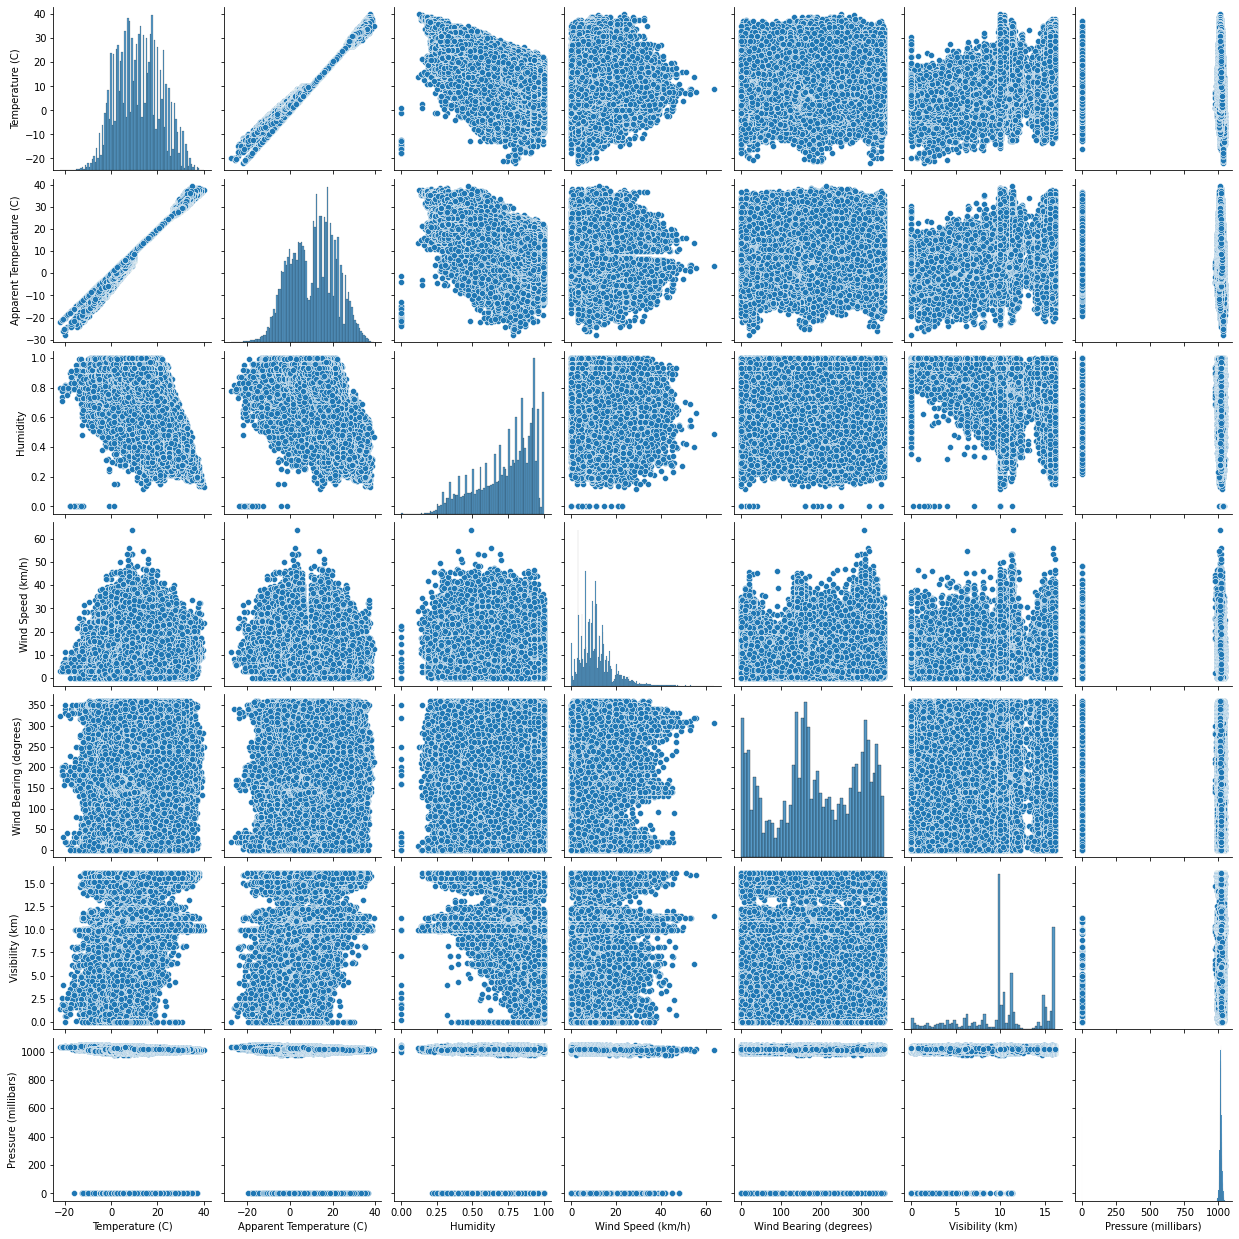

In [6]:
sns.pairplot(df)

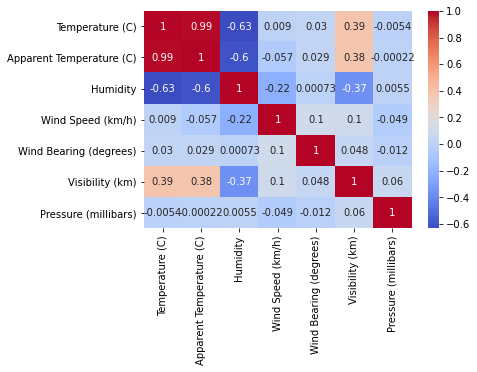

In [7]:
num_var = ["Temperature (C)","Apparent Temperature (C)",	"Humidity",	"Wind Speed (km/h)",	"Wind Bearing (degrees)",	"Visibility (km)","Pressure (millibars)"]
sns.heatmap(df[num_var].corr(),cmap="coolwarm",annot=True)

# Prepare data for machine learning model

In [8]:
# data cleaning

In [9]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [10]:
df.isnull().mean()*100

Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64

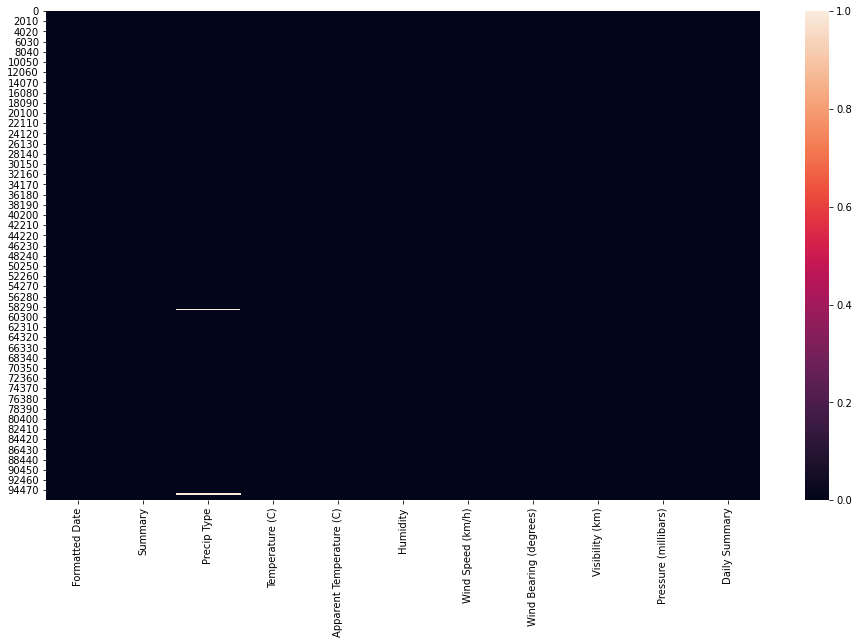

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [12]:
# fill missing value
df2 = df.dropna()
df2.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 6   Wind Speed (km/h)         95936 non-null  float64
 7   Wind Bearing (degrees)    95936 non-null  int64  
 8   Visibility (km)           95936 non-null  float64
 9   Pressure (millibars)      95936 non-null  float64
 10  Daily Summary             95936 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.8+ MB


In [23]:
df2['Formatted Date'] = pd.to_datetime(df2['Formatted Date'], utc=True)
df2['Formatted Date']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
5       2006-04-01 03:00:00+00:00
6       2006-04-01 04:00:00+00:00
7       2006-04-01 05:00:00+00:00
8       2006-04-01 06:00:00+00:00
9       2006-04-01 07:00:00+00:00
10      2006-04-01 08:00:00+00:00
11      2006-04-01 09:00:00+00:00
12      2006-04-01 10:00:00+00:00
13      2006-04-01 11:00:00+00:00
14      2006-04-01 12:00:00+00:00
15      2006-04-01 13:00:00+00:00
16      2006-04-01 14:00:00+00:00
17      2006-04-01 15:00:00+00:00
18      2006-04-01 16:00:00+00:00
19      2006-04-01 17:00:00+00:00
20      2006-04-01 18:00:00+00:00
21      2006-04-01 19:00:00+00:00
22      2006-04-01 20:00:00+00:00
23      2006-04-01 21:00:00+00:00
24      2006-04-09 22:00:00+00:00
25      2006-04-09 23:00:00+00:00
26      2006-04-10 00:00:00+00:00
27      2006-04-10 01:00:00+00:00
28      2006-04-10 02:00:00+00:00
29      2006-0

In [26]:
df2.describe()

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     95936.000000              95936.000000  95936.000000   
mean         11.940976                 10.862531      0.734841   
std           9.570671                 10.717812      0.195724   
min         -21.822222                -27.716667      0.000000   
25%           4.604167                  2.276389      0.600000   
50%          12.033333                 12.033333      0.780000   
75%          18.844444                 18.844444      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
count       95936.000000            95936.000000     95936.000000   
mean           10.804936              187.518773        10.362402   
std             6.920727              107.385351         4.173780   
min             0.000000                0.000000         0.000000   
25%             5.796000              116.000000         8.372000   
50%             9.933700              180.000000        10.046400   
75%            14.135800              290.000000        14.812000   
max            63.852600              359.000000        16.100000   

       Pressure (millibars)  
count          95936.000000  
mean            1003.150038  
std              117.276976  
min                0.000000  
25%             1011.890000  
50%             1016.420000  
75%             1021.050000  
max             1046.380000

In [28]:
df2= df2.set_index("Formatted Date")
df2.head(2)

Summary Precip Type  Temperature (C)  \
Formatted Date                                                          
2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222   
2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   

                           Apparent Temperature (C)  Humidity  \
Formatted Date                                                  
2006-03-31 22:00:00+00:00                  7.388889      0.89   
2006-03-31 23:00:00+00:00                  7.227778      0.86   

                           Wind Speed (km/h)  Wind Bearing (degrees)  \
Formatted Date                                                         
2006-03-31 22:00:00+00:00            14.1197                     251   
2006-03-31 23:00:00+00:00            14.2646                     259   

                           Visibility (km)  Pressure (millibars)  \
Formatted Date                                                     
2006-03-31 22:00:00+00:00          15.8263               1015.13   
2006-03-31 23:00:00+00:00          15.8263               1015.63   

                                               Daily Summary  
Formatted Date                                                
2006-03-31 22:00:00+00:00  Partly cloudy throughout the day.  
2006-03-31 23:00:00+00:00  Partly cloudy throughout the day.

In [30]:
data_columns = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = df2[data_columns].resample('MS').mean()
df_monthly_mean.head()

Apparent Temperature (C)  Humidity
Formatted Date                                               
2005-12-01 00:00:00+00:00                 -4.050000  0.890000
2006-01-01 00:00:00+00:00                 -4.173708  0.834610
2006-02-01 00:00:00+00:00                 -2.990716  0.843467
2006-03-01 00:00:00+00:00                  1.969780  0.778737
2006-04-01 00:00:00+00:00                 12.098827  0.728625

In [31]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature and Humidity with time")
sns.lineplot(data=df_monthly_mean)

In [32]:
df3 = df_monthly_mean[df_monthly_mean.index.month==4]
print(df3)
df3.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-04-01 00:00:00+00:00                 12.098827  0.728625
2007-04-01 00:00:00+00:00                 11.894421  0.536361
2008-04-01 00:00:00+00:00                 11.183688  0.693194
2009-04-01 00:00:00+00:00                 14.267076  0.567847
2010-04-01 00:00:00+00:00                 11.639406  0.706875
2011-04-01 00:00:00+00:00                 12.978997  0.591625
2012-04-01 00:00:00+00:00                 11.780703  0.643583
2013-04-01 00:00:00+00:00                 12.045563  0.677667
2014-04-01 00:00:00+00:00                 12.486181  0.691403
2015-04-01 00:00:00+00:00                 10.632801  0.547764
2016-04-01 00:00:00+00:00                 12.731427  0.659972


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

In [34]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(18,7))
ax.plot(df3.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
ax.plot(df3.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
#ax.set_xticks(['04-01-2006','04-01-2007','04-01-2008','04-01-2009','04-01-2010','04-01-2011','04-01-2012','04-01-2013','04-01-2014','04-01-2015','04-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc ='center right')
ax.set_xlabel('Month of April')

Text(0.5, 0, 'Month of April')

In [35]:
sns.lmplot(x='Apparent Temperature (C)',y='Humidity',data=df_monthly_mean)
plt.show()

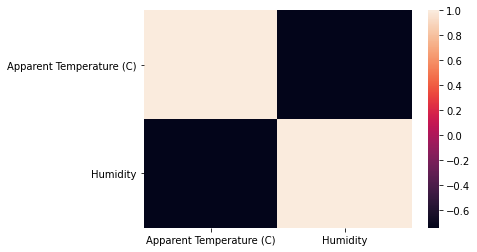

In [36]:
corr = df_monthly_mean.corr()
sns.heatmap(corr)

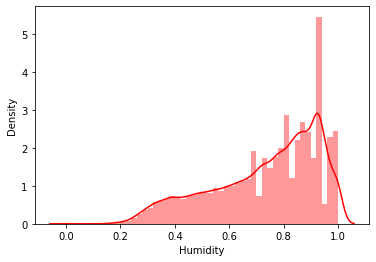

In [37]:
sns.distplot(df.Humidity,color='red')

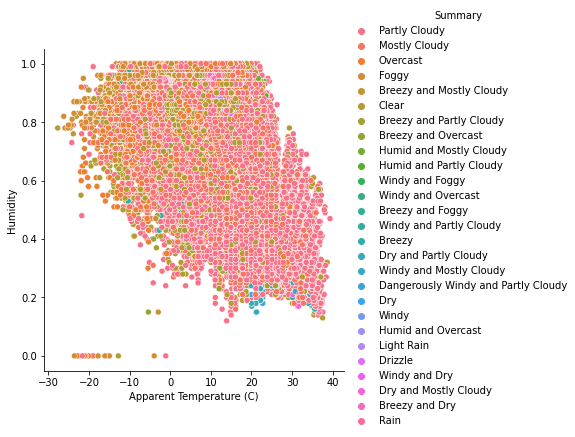

In [38]:
sns.relplot(data=df,x="Apparent Temperature (C)",y="Humidity",color="purple",hue="Summary")

# Conclusion

In [40]:
"""Global warming is no doubt deteriorating the climate and is affecting various parameters of the environment.Hence from this analysis we infer that there are either sharp rise in temperatures or sharp falls over the 10 yrs. Hence we can conclude that Global Warming has caused a major difference and unreliability in temperature predictability also taking humidity into consideration we can say that it has almost remained same throughout the past years."""

'Global warming is no doubt deteriorating the climate and is affecting various parameters of the environment.Hence from this analysis we infer that there are either sharp rise in temperatures or sharp falls over the 10 yrs. Hence we can conclude that Global Warming has caused a major difference and unreliability in temperature predictability also taking humidity into consideration we can say that it has almost remained same throughout the past years.'